<a href="https://colab.research.google.com/github/PiYushZ8/ML_climateaction/blob/main/Climate_Action_PiyushSanap_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libararies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

# **Dataset(From kaggel)**

In [ ]:
data = pd.read_csv('climate_change_dataset.csv')
data.head(5)


,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056918907353285,NaN,184.89969755743786,89.62081302618182,9.742885739415993,NaN,58.530797670209076,NaN,40.7128,NaN,10.0,15.0,NaN,0.04423782887418304,0.6336943092843479,33.43707805480527,18.545360112309588
1,2020.0,2.0,NaN,25.901916083791665,3.1739745975583844,2.957244192049635,95.17102000342224,10.64824600272703,252.3136442294677,32.85666516634471,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.6128400325468267,NaN,24.504783135571934,15.909586979280654
2,2020.0,3.0,7.869842,18.63424149980029,10.42485208665568,NaN,NaN,NaN,247.39139984511084,29.380233637986674,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.4665653848003175,-0.4280583600093959,32.3274997743319,21.281093622177334
3,NaN,4.0,-0.049863,13.030562376875533,-9.196433418151315,102.4544605414934,Unknown,0.898697634212508,143.26161801322706,17.496855610388273,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030465932726280065,-0.5707078659552114,20.496275820817043,NaN
4,2020.0,5.0,19.895067,35.88212887551623,20.067999652410148,185.72922332959365,73.99994640624561,13.128301152215258,169.5494376964624,2.1937104861995405,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,NaN,-0.2861494705734404,22.64905691725084,15.502968235198333


In [ ]:
data.isnull().sum()

,0
Year,5
Month,5
Avg_Temp (°C),7
Max_Temp (°C),7
Min_Temp (°C),8
Precipitation (mm),4
Humidity (%),8
Wind_Speed (m/s),2
Solar_Irradiance (W/m²),5
Cloud_Cover (%),4


<Axes: >

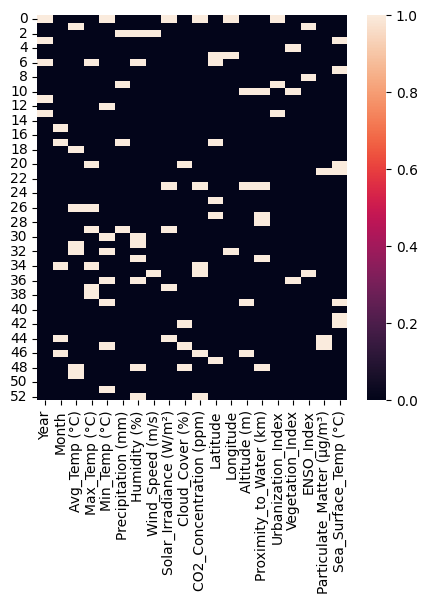

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull())

In [ ]:
missing_value_percent = data.isnull().sum() / data.shape[0] * 100
print(missing_value_percent)

Year                           9.433962
Month                          9.433962
Avg_Temp (°C)                 13.207547
Max_Temp (°C)                 13.207547
Min_Temp (°C)                 15.094340
Precipitation (mm)             7.547170
Humidity (%)                  15.094340
Wind_Speed (m/s)               3.773585
Solar_Irradiance (W/m²)        9.433962
Cloud_Cover (%)                7.547170
CO2_Concentration (ppm)       11.320755
Latitude                      11.320755
Longitude                      5.660377
Altitude (m)                   7.547170
Proximity_to_Water (km)       11.320755
Urbanization_Index             5.660377
Vegetation_Index               5.660377
ENSO_Index                     5.660377
Particulate_Matter (µg/m³)     5.660377
Sea_Surface_Temp (°C)         13.207547
dtype: float64


In [ ]:
dataset = data.dropna()

<Axes: >

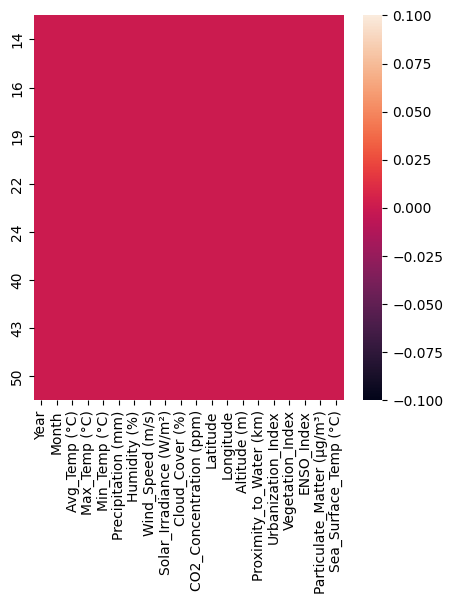

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(dataset.isnull())

In [ ]:
missing_value_percent = dataset.isnull().sum() / dataset.shape[0] * 100
print(missing_value_percent)

Year                          0.0
Month                         0.0
Avg_Temp (°C)                 0.0
Max_Temp (°C)                 0.0
Min_Temp (°C)                 0.0
Precipitation (mm)            0.0
Humidity (%)                  0.0
Wind_Speed (m/s)              0.0
Solar_Irradiance (W/m²)       0.0
Cloud_Cover (%)               0.0
CO2_Concentration (ppm)       0.0
Latitude                      0.0
Longitude                     0.0
Altitude (m)                  0.0
Proximity_to_Water (km)       0.0
Urbanization_Index            0.0
Vegetation_Index              0.0
ENSO_Index                    0.0
Particulate_Matter (µg/m³)    0.0
Sea_Surface_Temp (°C)         0.0
dtype: float64


In [ ]:
dataset.select_dtypes(include=['int64','float64']).columns # Cheking the column names of numerical DataFrame.

Index(['Avg_Temp (°C)', 'CO2_Concentration (ppm)', 'Urbanization_Index'], dtype='object')

In [ ]:
num_var = ['Avg_Temp (°C)', 'CO2_Concentration (ppm)', 'Urbanization_Index']

<ipython-input-62-17c3917cc0b3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[var], bins=20, color = 'red')
<ipython-input-62-17c3917cc0b3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[var], bins=20)
<ipython-input-62-17c3917cc0b3>:6: UserWarning: 

`distplot` is a deprecated

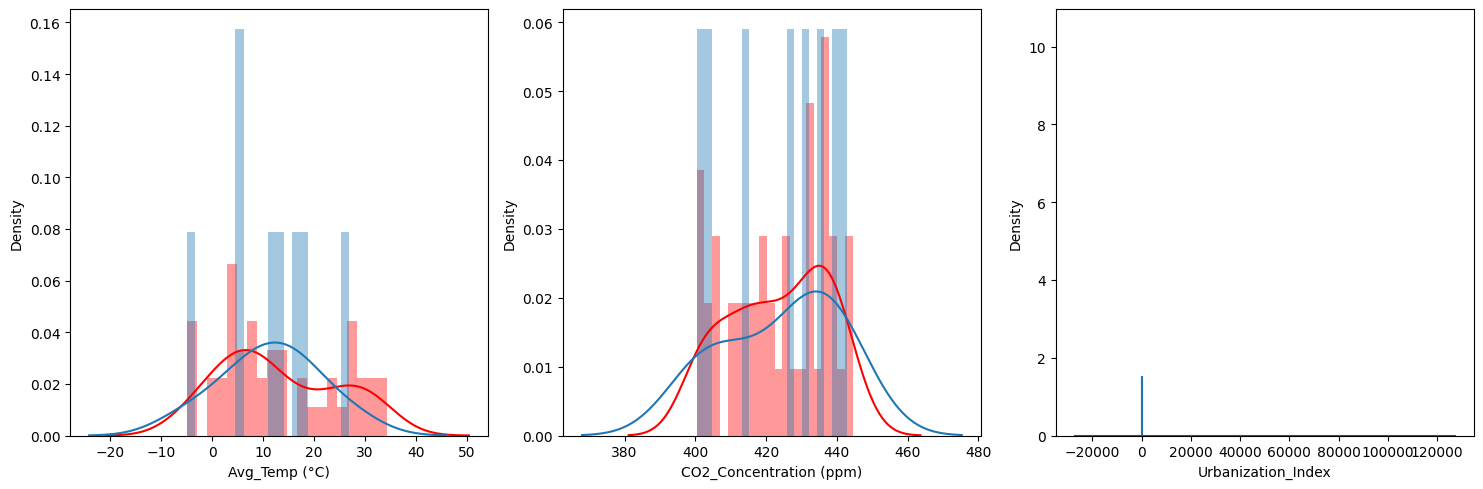

In [ ]:
num_rows = 1 # Adjust the number of columns as needed
num_cols = 3 # Adjust the number of rows as needed
plt.figure(figsize=(15, 5))
for i, var in enumerate(num_var):
  plt.subplot(num_rows, num_cols, i+1)
  sns.distplot(data[var], bins=20, color = 'red')
  sns.distplot(dataset[var], bins=20)
plt.tight_layout() # Optional: Adjusts the spacing between subplots
plt.show()

In [ ]:
print(dataset.head())
print(dataset.info())
print(dataset.describe())
print(dataset.shape)

      Year Month  Avg_Temp (°C)       Max_Temp (°C)        Min_Temp (°C)  \
14  2021.0   3.0      17.699151  22.484153439467317   25.514134021145374   
16  2021.0   5.0       4.692808   35.39726861150831   14.845232854964834   
19  2021.0   8.0       5.730457   38.71251852259356   12.857216488259652   
22  2021.0  11.0      26.816869   4.956329707032308  -3.2796282308566127   
24  2022.0   1.0      17.114139  20.371654648464506   15.216323787995751   

    Precipitation (mm)       Humidity (%)    Wind_Speed (m/s)  \
14   131.4142769650361  49.27602355528687  2.0530369438850364   
16             99999.0  30.87108243855665     4.7731368815318   
19   147.0097105134194  94.34708926029289   11.08227469946344   
22  132.87115278574282  41.02346163331576    8.14167693149351   
24   92.30967632258186  54.91768116461336  11.367768060997024   

   Solar_Irradiance (W/m²)     Cloud_Cover (%)  CO2_Concentration (ppm)  \
14      106.42712139805457  24.803797055628163               442.844226   
16

In [ ]:
dataset.head()

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
14,2021.0,3.0,17.699151,22.484153439467317,25.514134021145374,131.4142769650361,49.27602355528687,2.0530369438850364,106.42712139805457,24.803797055628163,442.844226,40.7128,-74.006,10.0,15.0,0.713257,0.05555831355441099,-0.3779864949728524,22.39792534968618,26.332337200749937
16,2021.0,5.0,4.692808,35.39726861150831,14.845232854964834,99999.0,30.87108243855665,4.7731368815318,298.4491952489933,76.08525705265296,400.440253,40.7128,-74.006,10.0,15.0,0.273766,0.28442647770951124,-0.6287623344588649,30.774148926534195,17.898957983163385
19,2021.0,8.0,5.730457,38.71251852259356,12.857216488259652,147.0097105134194,94.34708926029289,11.08227469946344,245.4119103355245,80.8602639893691,431.897291,40.7128,-74.006,10.0,15.0,0.708359,0.56911704319706,-0.7101226950672235,48.649348914623324,11.210670049902053
22,2021.0,11.0,26.816869,4.956329707032308,-3.2796282308566127,132.87115278574282,41.02346163331576,8.14167693149351,229.2201945689563,18.157219084682342,403.418272,40.7128,-74.006,10.0,15.0,0.318733,0.5678061204535925,0.7928381640252535,41.18789515446911,13.065127182543307
24,2022.0,1.0,17.114139,20.371654648464506,15.216323787995751,92.30967632258186,54.91768116461336,11.367768060997024,174.30758885994237,19.075636871871627,413.309121,40.7128,-74.006,10.0,15.0,0.571835,0.052938563045685116,-0.2739109632960237,44.25614691027019,11.244044595740325


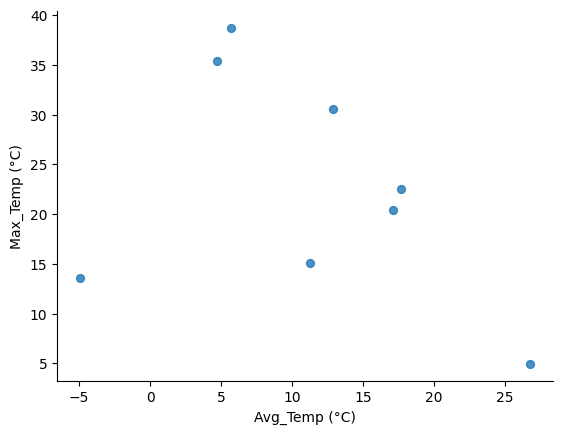

In [ ]:
# @title Avg_Temp (°C) vs Max_Temp (°C)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Avg_Temp (°C)', y='Max_Temp (°C)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

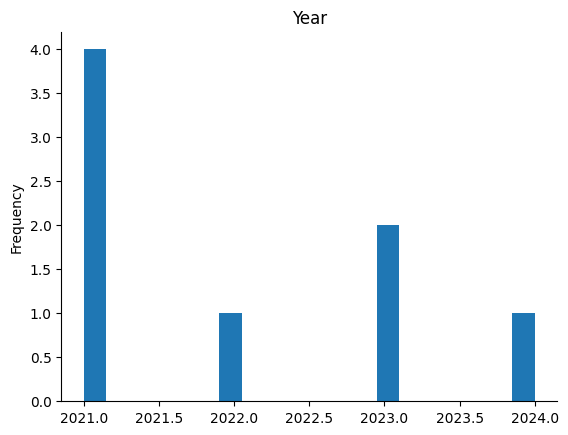

In [ ]:
# @title Year

from matplotlib import pyplot as plt
dataset['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

Index(['Year', 'Month', 'Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)',
       'Precipitation (mm)', 'Humidity (%)', 'Wind_Speed (m/s)',
       'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)', 'CO2_Concentration (ppm)',
       'Latitude', 'Longitude', 'Altitude (m)', 'Proximity_to_Water (km)',
       'Urbanization_Index', 'Vegetation_Index', 'ENSO_Index',
       'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)'],
      dtype='object')


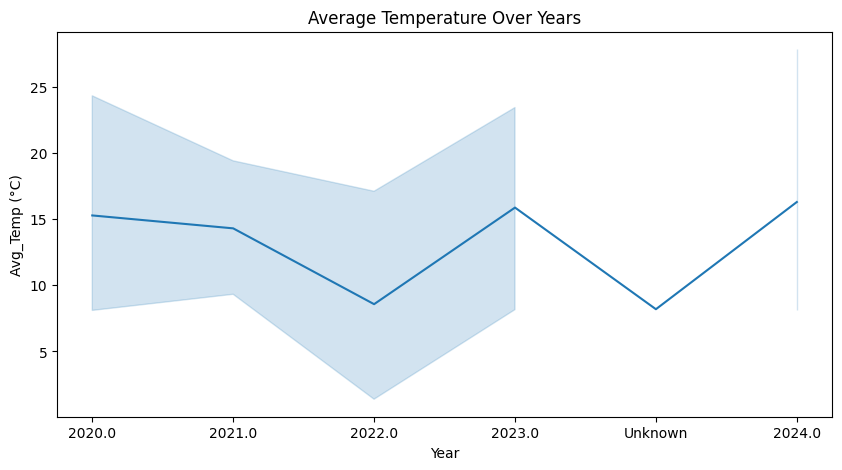

In [ ]:
print(data.columns)
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Year', y='Avg_Temp (°C)')
plt.title('Average Temperature Over Years')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'dataset' is your DataFrame
# Replace 'Unknown' with NaN
dataset = dataset.replace('Unknown', pd.NA)

# Convert object columns to numeric, coercing errors to NaN
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Now apply StandardScaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
print(dataset_scaled)

[[-8.94427191e-01 -8.11107106e-01  6.93864203e-01 -1.51531386e-02
   1.39284355e+00 -3.77264595e-01 -6.97800856e-01 -1.54224264e+00
  -1.60826096e+00 -8.06917040e-01  1.21671354e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  4.84570464e-01
  -1.23708579e+00 -6.10721603e-01 -9.55298943e-01  1.52557530e+00]
 [-8.94427191e-01 -1.62221421e-01 -7.41031177e-01  1.17542620e+00
   3.69180377e-01  2.64575017e+00 -1.47153708e+00 -8.54003867e-01
   1.71974383e+00  8.43597483e-01 -1.54465951e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.52661864e+00
  -4.37147218e-01 -1.04075064e+00 -1.83419472e-01  8.74841394e-02]
 [-8.94427191e-01  8.11107106e-01 -6.26554831e-01  1.48108971e+00
   1.78433540e-01 -3.76792518e-01  1.19696837e+00  7.42332070e-01
   8.00535246e-01  9.97283012e-01  5.03842321e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  4.62159648e-01
   5.57901466e-01 -1.18026695e+00  1.46380255e+00 -1.05302757e+00]
 [-8.94

# Spliting dataset(here making use of humidity)

In [ ]:
from sklearn.model_selection import train_test_split

# Convert dataset_scaled back to DataFrame
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)

X = dataset_scaled.drop('Humidity (%)', axis=1)  # Now this should work
y = dataset_scaled['Humidity (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6, 19)
(2, 19)
(6,)
(2,)


# Data Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predicting a new result

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0.41011928 0.54765674]


# Mean Abs/Sqr Error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 1.0843590900259275
Mean Squared Error: 1.8115175642103671


In [ ]:
y_pred_df = pd.DataFrame(X_test, columns=X.columns)
y_pred_df['Humidity (%)'] = y_pred

X_test_scaled = y_pred_df.drop(columns=['Humidity (%)'])
humidity_index = dataset.columns.get_loc('Humidity (%)')
y_pred_original_partial = scaler.inverse_transform(X_test_scaled)

y_pred_original_df = pd.DataFrame(y_pred_original_partial, columns=X.columns)
y_pred_original_df['Humidity (%)'] = y_pred

y_pred_original = y_pred_original_df['Humidity (%)'].values
print(y_pred_original)

[0.41011928 0.54765674]


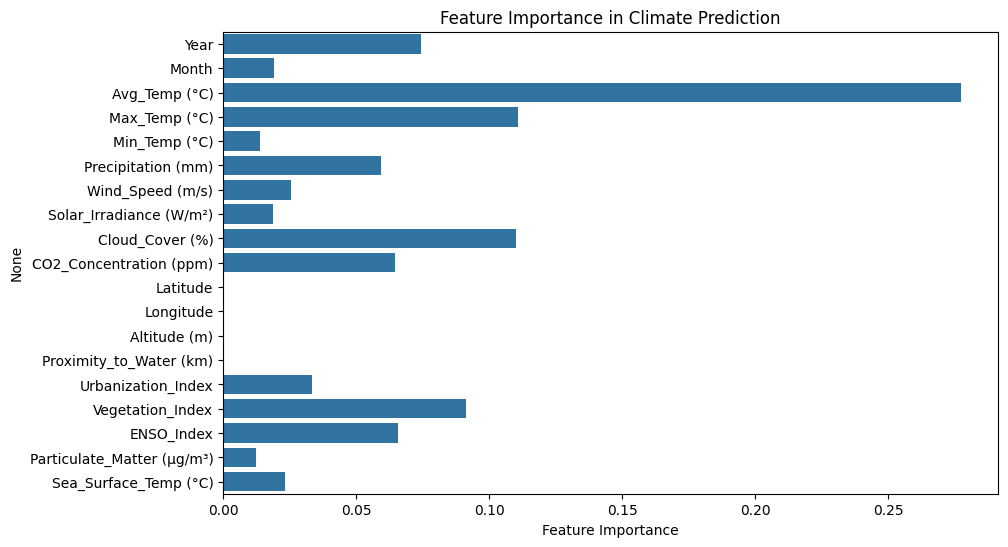

In [ ]:
import seaborn as sns
importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Climate Prediction')
plt.show()

In [ ]:
selected_data_point = X_test[[0]]

# Get the scaled value of 'Humidity (%)' for the selected data point
scaled_original_value = y_test.iloc[0]

# Create a temporary DataFrame to inverse transform the scaled original value
# *** Change: Use X.columns to ensure consistent features with the scaler ***
temp_df = pd.DataFrame(selected_data_point, columns=dataset.columns[:-1])  # Exclude Humidity (%)
temp_df['Humidity (%)'] = scaled_original_value

# Get the column index from dataset.columns
humidity_index = dataset.columns.get_loc('Humidity (%)')


# Now, inverse transform to get the original scale for the original value
# *** Change: Drop 'Humidity (%)' before inverse transforming and then add it back ***
original_value_temp = scaler.inverse_transform(temp_df.drop(columns=['Humidity (%)']))
original_value = original_value_temp[0, humidity_index -1] # Adjust index since Humidity is removed

# Use the predict method
prediction_scaled = model.predict(selected_data_point)

# Create a DataFrame with the same columns as the original dataset
pred_df_selected = pd.DataFrame(selected_data_point, columns=X.columns)
pred_df_selected['Humidity (%)'] = prediction_scaled

# Inverse transform to get the original scale for the prediction
# *** Change: Drop 'Humidity (%)' before inverse transforming and then add it back ***
prediction_original_temp = scaler.inverse_transform(pred_df_selected.drop(columns=['Humidity (%)']))
prediction_original = prediction_original_temp[0, humidity_index - 1] # Adjust index

# Print the prediction and original value
print("Prediction and Original Value for selected test data point:")
print(f"Original Value: {original_value}")
print(f"Predicted Value: {prediction_original}")

ValueError: operands could not be broadcast together with shapes (1,18) (19,) (1,18) 

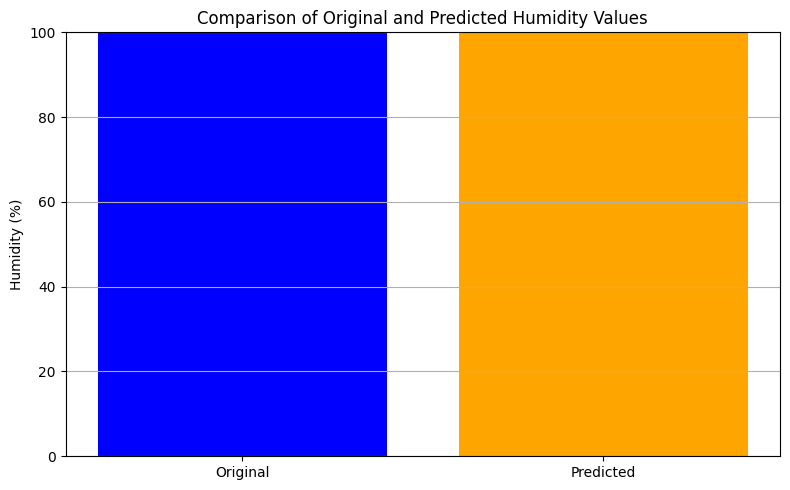

3278.2569632740947
3278.2569632740947


In [ ]:
original_value = original_value  # Original humidity value
predicted_value = prediction_original  # Predicted humidity value

humidity_data = pd.DataFrame({
    'Type': ['Original', 'Predicted'],
    'Humidity (%)': [original_value, predicted_value]
})
plt.figure(figsize=(8, 5))
plt.bar(humidity_data['Type'], humidity_data['Humidity (%)'], color=['blue', 'orange'])
plt.title('Comparison of Original and Predicted Humidity Values')
plt.ylabel('Humidity (%)')
plt.ylim([0, 100])
plt.grid(axis='y')

plt.tight_layout()
#plt.legend()
plt.show()
print(original_value)
print(predicted_value)

# Startegies

# For Future Predictions

In [ ]:
from sklearn.linear_model import LinearRegression
# Prepare data for linear regression
temp_model = LinearRegression()
humidity_model = LinearRegression()

# Assuming 'Year' is your independent variable and 'Avg_Temp (°C)' and 'Humidity (%)' are your dependent variables.
# Reshape 'Year' to a 2D array for sklearn
X = data['Year'].values.reshape(-1, 1)
y_temp = data['Avg_Temp (°C)']
y_humidity = data['Humidity (%)']

# Fit the models
temp_model.fit(X, y_temp)  # Fit temperature model
humidity_model.fit(X, y_humidity)  # Fit humidity model

LinearRegression()

     Year  Predicted Avg_Temp (°C)  Predicted Humidity (%)  \
0  2025.0                17.249390               67.416668   
1  2026.0                17.884871               67.999145   
2  2027.0                18.520352               68.581622   
3  2028.0                19.155833               69.164099   
4  2029.0                19.791314               69.746576   
5  2030.0                20.426794               70.329053   
6  2031.0                21.062275               70.911529   
7  2032.0                21.697756               71.494006   
8  2033.0                22.333237               72.076483   
9  2034.0                22.968718               72.658960   

                        Climate Strategy  
0  Normal Conditions: Monitor regularly.  
1  Normal Conditions: Monitor regularly.  
2  Normal Conditions: Monitor regularly.  
3  Normal Conditions: Monitor regularly.  
4  Normal Conditions: Monitor regularly.  
5  Normal Conditions: Monitor regularly.  
6  Normal Condit

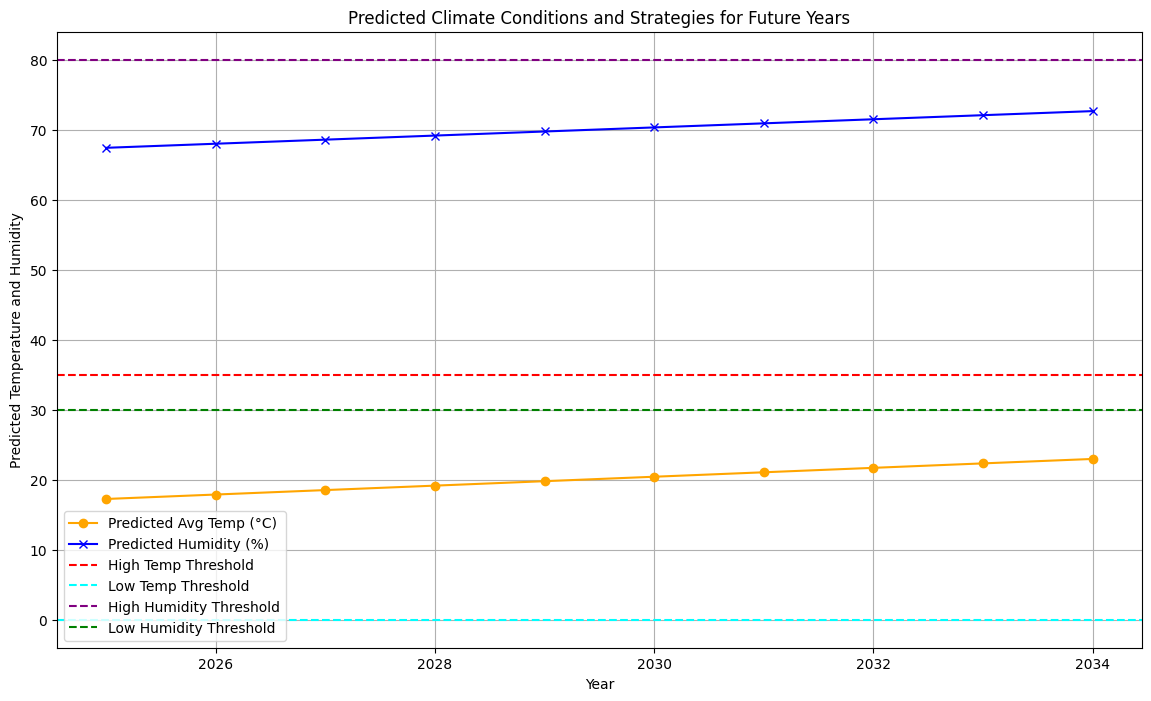

In [ ]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Drop rows with NaN values in 'Year' column (if any) introduced by conversion.
data.dropna(subset=['Year'], inplace=True)

# Now calculate future_years
future_years = np.arange(data['Year'].max() + 1, data['Year'].max() + 11).reshape(-1, 1)  # Predict for next 10 year

# Predict future temperature and humidity
future_temp = temp_model.predict(future_years)
future_humidity = humidity_model.predict(future_years)

# Compile predictions into a DataFrame
future_data = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Avg_Temp (°C)': future_temp,
    'Predicted Humidity (%)': future_humidity
})

# Apply the strategy function on the future data
def climate_strategy_pred(temp, humidity):
    if temp > temp_threshold_high and humidity < humidity_threshold_low:
        return "Drought Risk: Recommend water conservation and agricultural support."
    elif temp > temp_threshold_high and humidity > humidity_threshold_high:
        return "Heatwave Risk: Recommend heat warnings, cooling centers, and health advisories."
    elif temp < temp_threshold_low and humidity < humidity_threshold_low:
        return "Cold and Dry: Recommend heating solutions and air moisture management."
    elif temp < temp_threshold_low and humidity > humidity_threshold_high:
        return "Cold and Humid: Recommend health advisories for mold and respiratory issues."
    else:
        return "Normal Conditions: Monitor regularly."

# Apply strategies to future predictions
future_data['Climate Strategy'] = future_data.apply(lambda row: climate_strategy_pred(row['Predicted Avg_Temp (°C)'], row['Predicted Humidity (%)']), axis=1)

# Display predictions and strategies
print(future_data)

# Visualization of future predictions
plt.figure(figsize=(14, 8))
plt.plot(future_data['Year'], future_data['Predicted Avg_Temp (°C)'], marker='o', label='Predicted Avg Temp (°C)', color='orange')
plt.plot(future_data['Year'], future_data['Predicted Humidity (%)'], marker='x', label='Predicted Humidity (%)', color='blue')
plt.axhline(y=temp_threshold_high, color='red', linestyle='--', label='High Temp Threshold')
plt.axhline(y=temp_threshold_low, color='cyan', linestyle='--', label='Low Temp Threshold')
plt.axhline(y=humidity_threshold_high, color='purple', linestyle='--', label='High Humidity Threshold')
plt.axhline(y=humidity_threshold_low, color='green', linestyle='--', label='Low Humidity Threshold')
plt.xlabel('Year')
plt.ylabel('Predicted Temperature and Humidity')
plt.title('Predicted Climate Conditions and Strategies for Future Years')
plt.legend()
plt.grid()
plt.show()